In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#!pip install autoviz
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
import seaborn as sns
from pandas.plotting import scatter_matrix

In [115]:
%matplotlib inline
pd.set_option('display.max_rows', 10)

In [116]:
df = pd.read_csv('https://github.com/ArinB/MSBA-CA-Data/raw/main/CA01/house-price-train.csv')

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Data Understanding

In [98]:
#check to see null values in columns
df.isnull().sum(axis=0)

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [99]:
##no duplicate rows
df.duplicated().sum(axis=0)

0

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [92]:
##auto-Viz to do 
sep = ',' 
dft = AV.AutoViz(filename="",sep=sep, depVar='SalePrice', dfte=df, header=0, verbose=1, 
lowess=False, chart_format='bokeh', max_rows_analyzed=10000, max_cols_analyzed=10000)

Shape of your Data Set loaded: (1460, 81)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
Data cleaning improvement suggestions. Complete them before proceeding to ML modeling.


,Nuniques,dtype,Nulls,Nullpercent,NuniquePercent,Value counts Min,Data cleaning improvement suggestions
Id,1460,int64,0,0.000000,100.000000,0,possible ID column: drop
LotArea,1073,int64,0,0.000000,73.493151,0,
GrLivArea,861,int64,0,0.000000,58.972603,0,
BsmtUnfSF,780,int64,0,0.000000,53.424658,0,
1stFlrSF,753,int64,0,0.000000,51.575342,0,
TotalBsmtSF,721,int64,0,0.000000,49.383562,0,
BsmtFinSF1,637,int64,0,0.000000,43.630137,0,
GarageArea,441,int64,0,0.000000,30.205479,0,
2ndFlrSF,417,int64,0,0.000000,28.561644,0,
MasVnrArea,327,float64,8,0.547945,22.397260,0,"fill missing, skewed: cap or drop outliers"


    80 Predictors classified...
        4 variables removed since they were ID or low-information variables
        List of variables removed: ['Id', 'Alley', 'PoolQC', 'MiscFeature']

################ Regression problem #####################
   Total columns > 30, too numerous to print.


Column
    [0] Row
        [0] HoloViews(DynamicMap)
        [1] Column
            [0] WidgetBox
                [0] Select(margin=(20, 20, 20, 20), options=['LotFrontage', ...], value='LotFrontage', width=250)
            [1] VSpacer()

Row
    [0] WidgetBox
        [0] Select(name='X-Axis', options=['LotFrontage', ...], value='LotFrontage')
        [1] Select(name='Y-Axis', options=['LotFrontage', ...], value='MasVnrArea')
        [2] Select(name='Color', options=['None', 'SalePrice'], value='None')
    [1] ParamFunction(function)

Column
    [0] Row
        [0] HoloViews(DynamicMap)
        [1] Column
            [0] WidgetBox
                [0] Select(margin=(20, 20, 20, 20), options=['MSZoning', 'LotShape', ...], value='MSZoning', width=250)
            [1] VSpacer()

Column
    [0] Row
        [0] HoloViews(DynamicMap)
        [1] Column
            [0] WidgetBox
                [0] Select(margin=(20, 20, 20, 20), options=['GarageYrBlt', ...], value='GarageYrBlt', width=250)
            [1] VSpacer()

HoloViews(DynamicMap)

HoloViews(Violin)

HoloViews(Overlay)

Row
    [0] WidgetBox
        [0] Select(name='X-Axis', options=['YearRemodAdd', ...], value='YearRemodAdd')
        [1] Select(name='Y-Axis', options=['LotFrontage', ...], value='LotFrontage')
    [1] ParamFunction(function)

Row
    [0] WidgetBox
        [0] Select(name='X-Axis', options=['MSZoning', 'LotShape', ...], value='MSZoning')
        [1] Select(name='Y-Axis', options=['LotFrontage', ...], value='LotFrontage')
    [1] ParamFunction(function)

Time to run AutoViz (in seconds) = 2


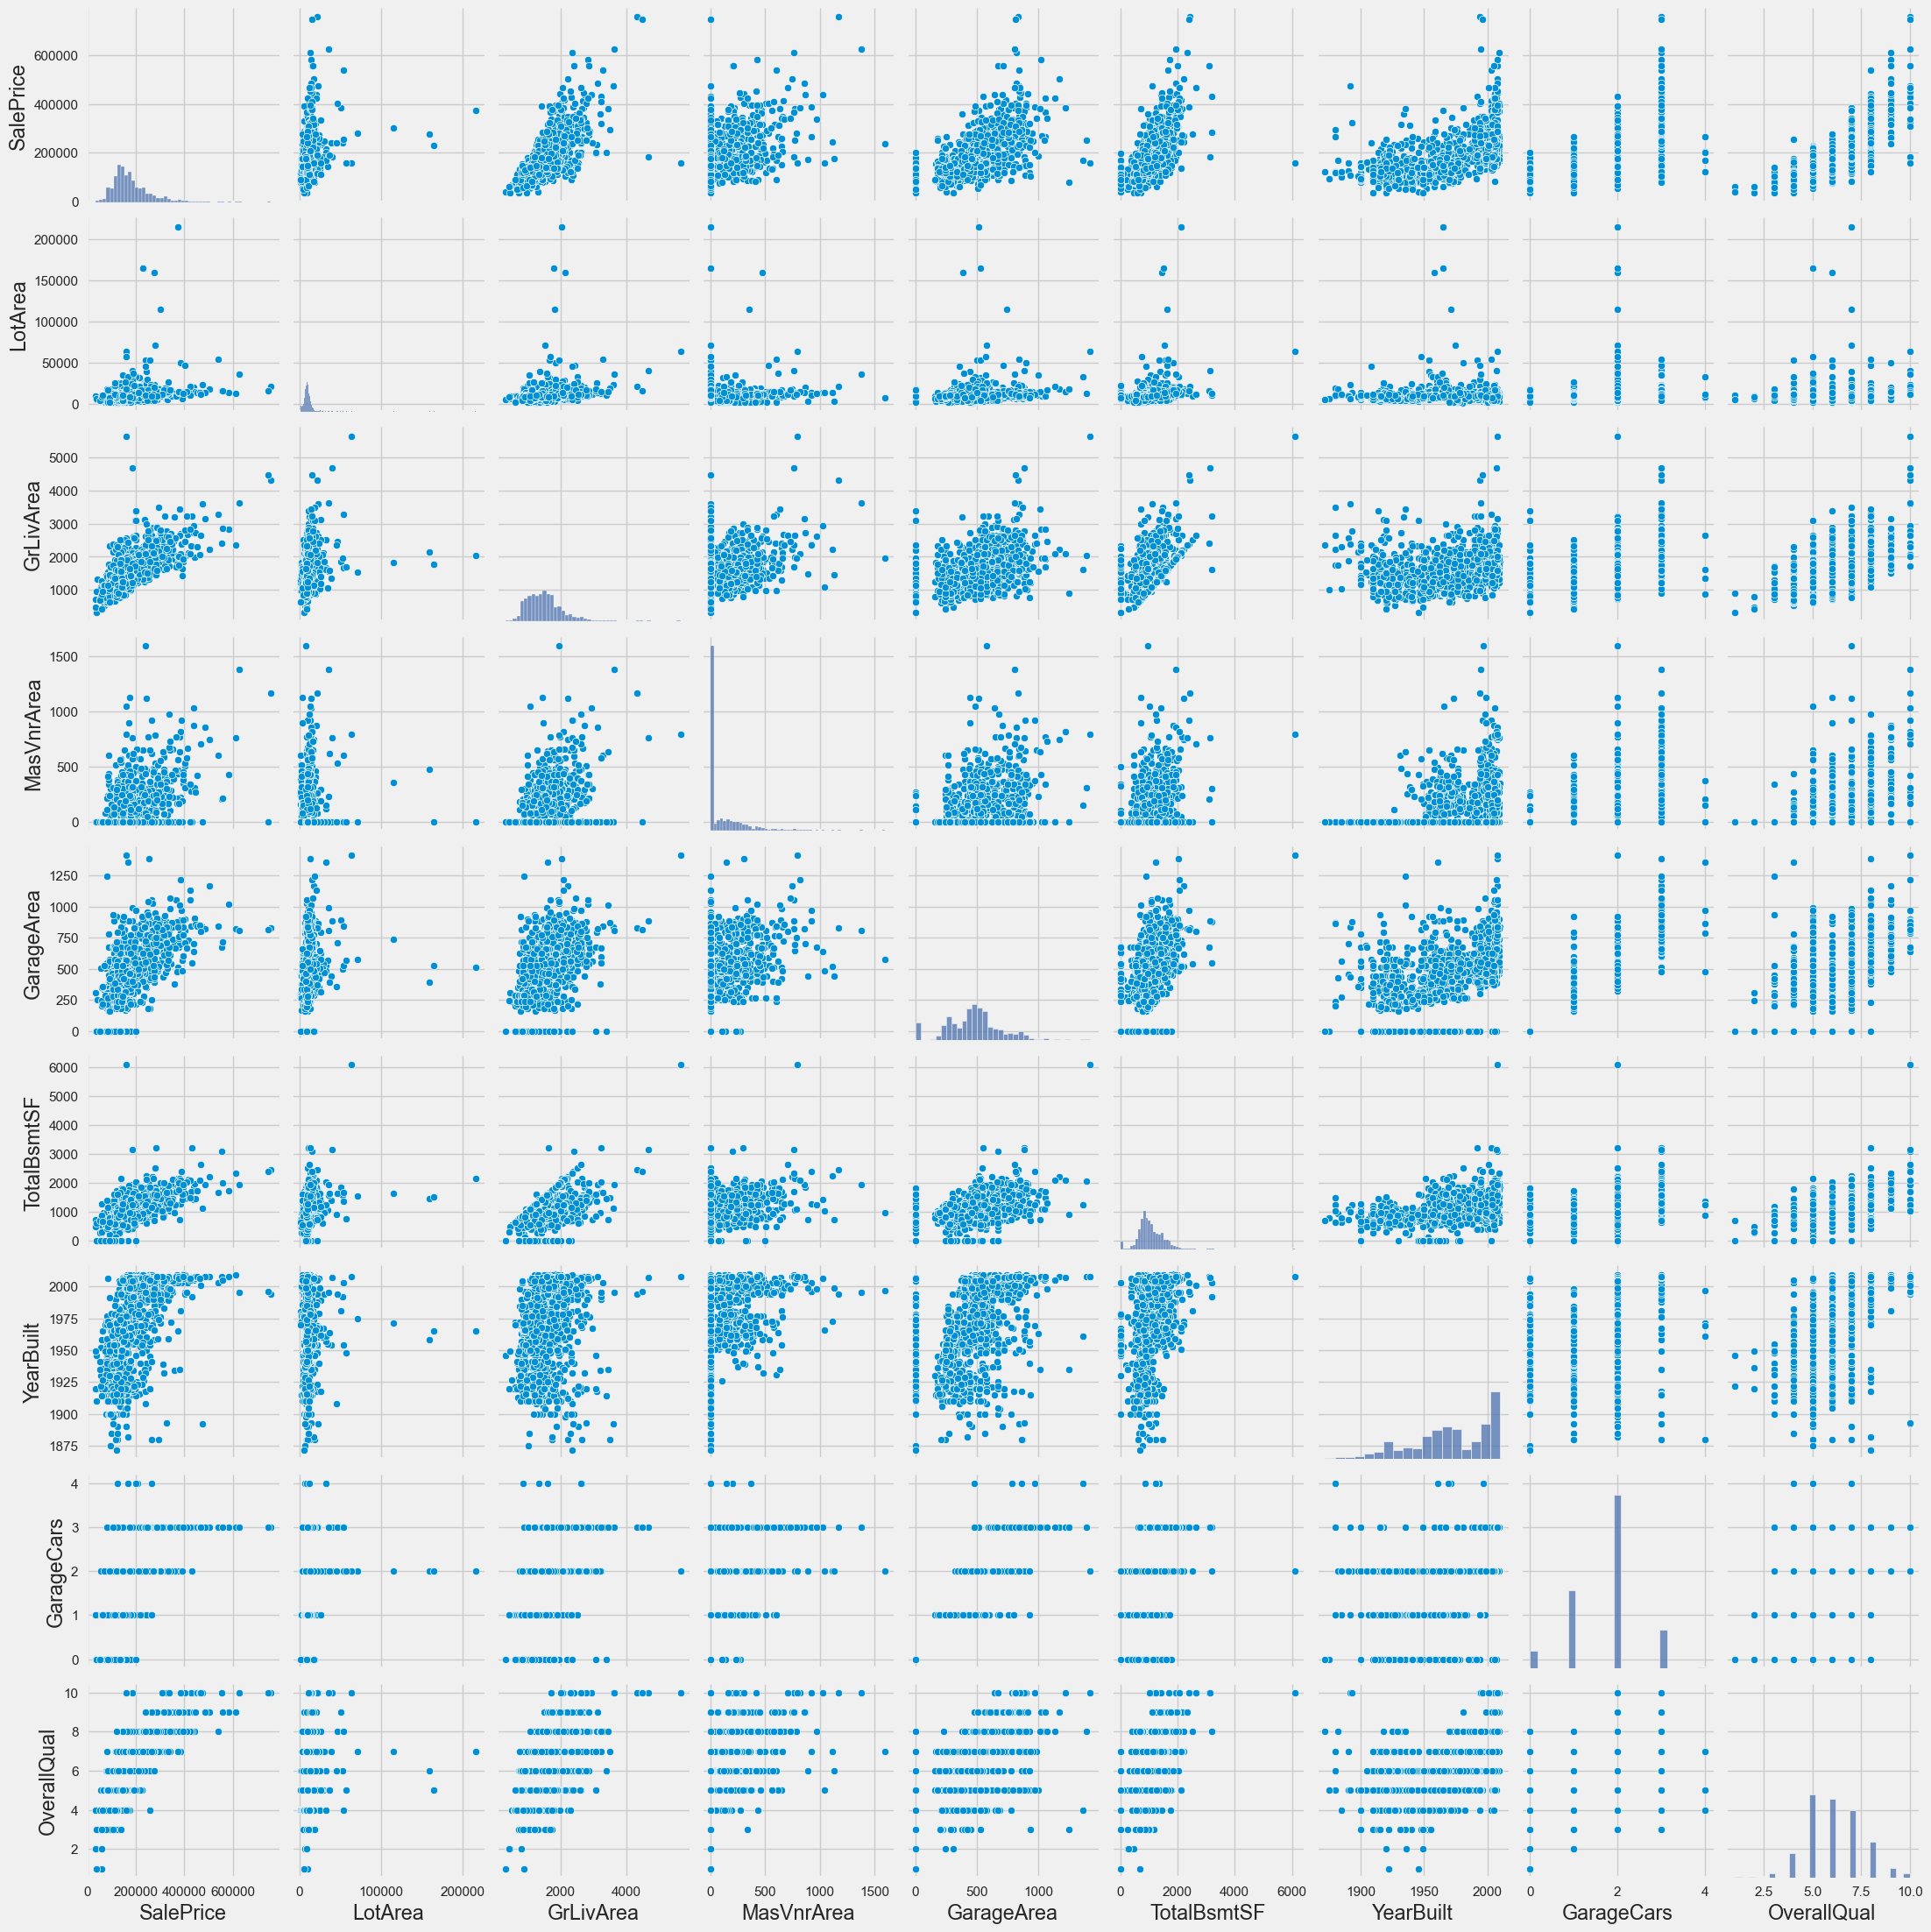

In [93]:
sns.pairplot(df, vars=['SalePrice', 'LotArea','GrLivArea','MasVnrArea', 'GarageArea','TotalBsmtSF','YearBuilt','GarageCars', 'OverallQual'])
plt.show()

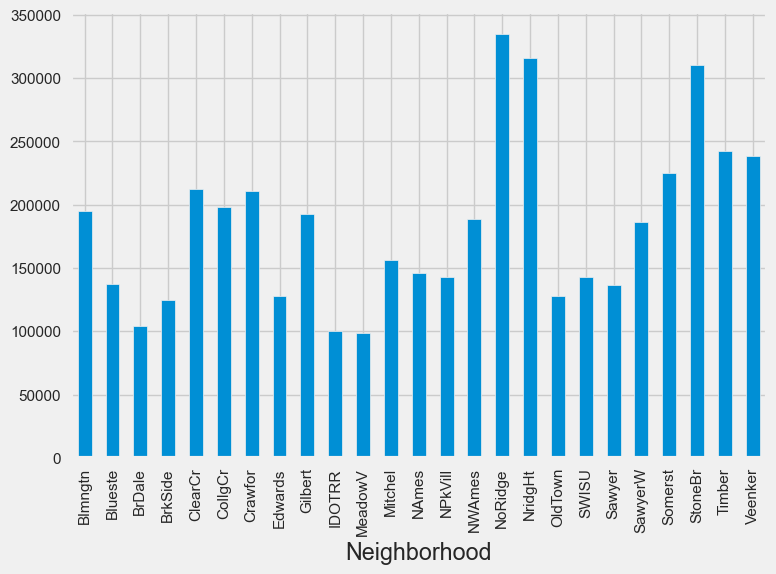

In [118]:
#bar chart of sale price and neighborhood
nbh_saleprice = df.groupby(['Neighborhood'])['SalePrice'].mean()
nbh_saleprice.plot(kind='bar')
plt.show()

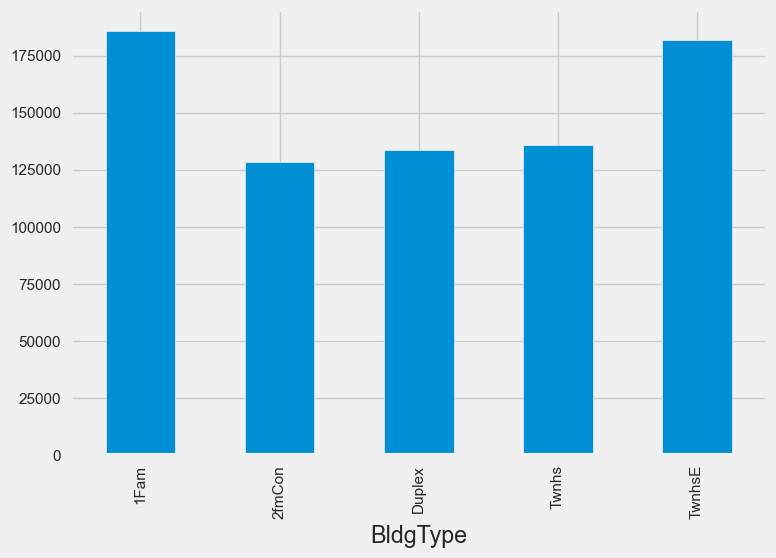

In [44]:
#average sale price of different house styles
hs_saleprice = df.groupby(['BldgType'])['SalePrice'].mean()
hs_saleprice.plot(kind='bar')
plt.show()

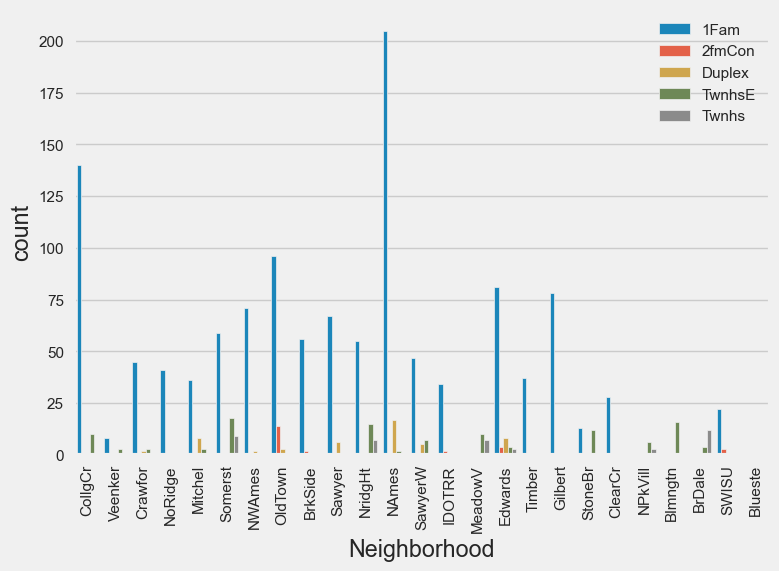

In [119]:
#bar chart of building type and house stye
bldg_saleprice = sns.countplot(x='Neighborhood', hue='BldgType', data=df)
plt.legend(loc='upper right')
plt.xticks(rotation=90)
plt.show()

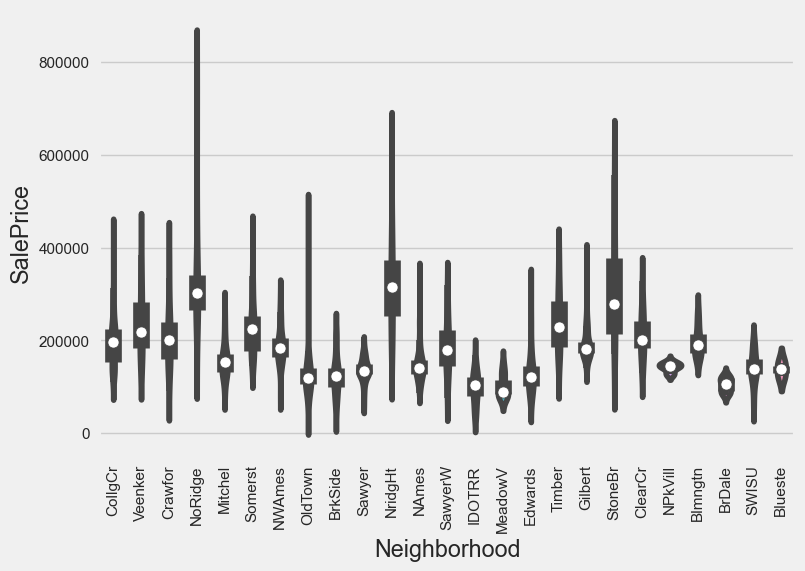

In [120]:
#distribution of sale price by neighborhood
sns.violinplot(x='Neighborhood', y='SalePrice', data=df)
plt.ylabel('SalePrice')
plt.xticks(rotation=90)
plt.show()

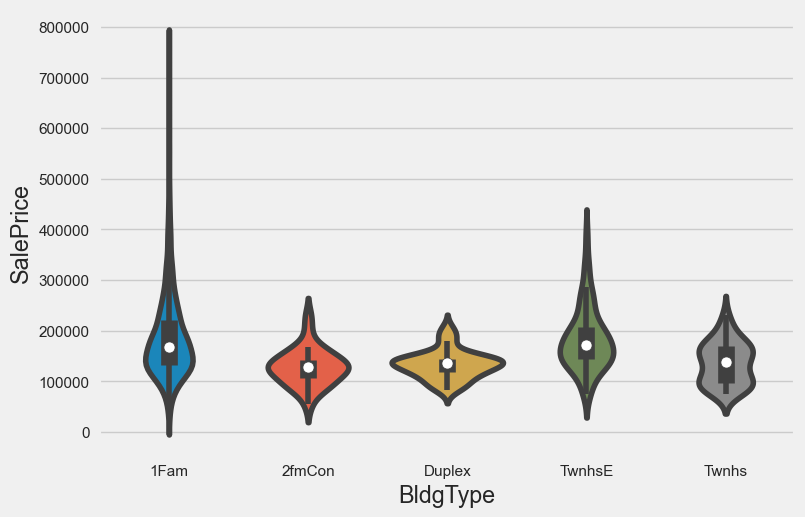

In [121]:
#distribution of sale price by house style
sns.violinplot(x='BldgType', y='SalePrice', data=df)
plt.ylabel('SalePrice')
plt.show()

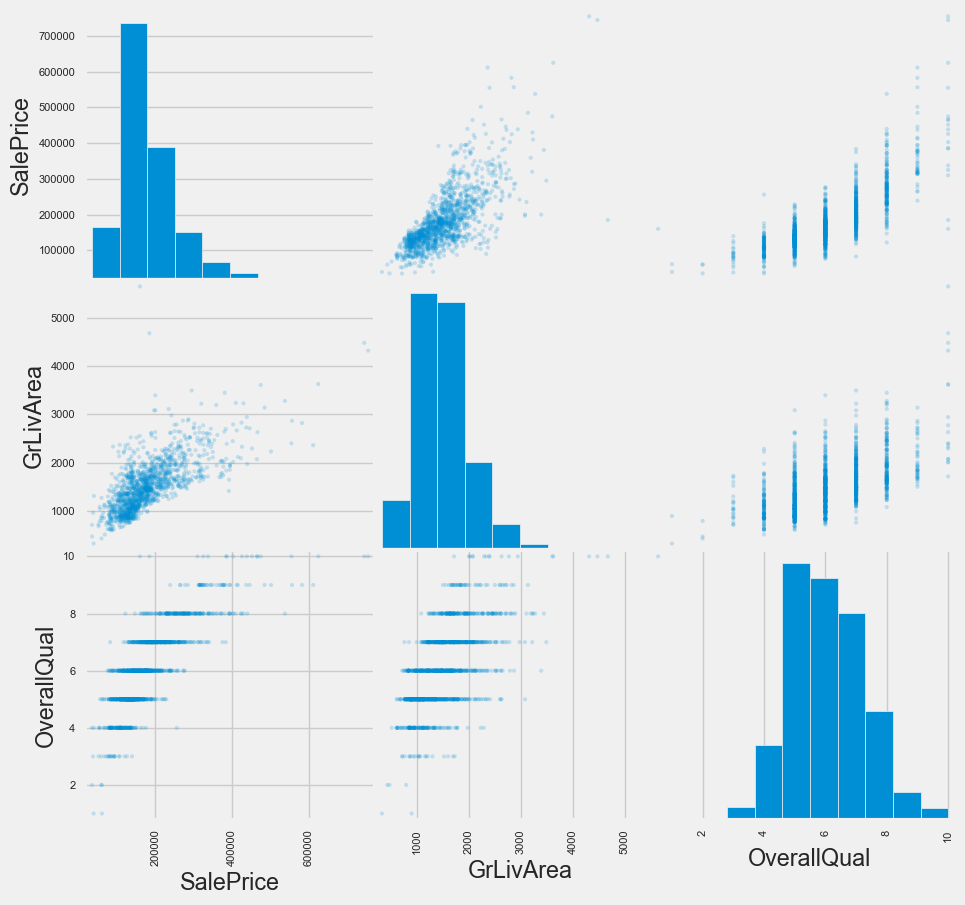

In [33]:
scatter_matrix(df[['SalePrice', 'GrLivArea', 'OverallQual']], alpha=0.2, figsize=(10, 10))
plt.show()

# Data Quality Report

| Feature | Data Quality Issue | Potential Handling Strategies |
| :- | -: | :-: |
| Alley | High Missing Values | Delete Column
| MiscFeature | Missing Values | Delete Column
| PoolQC | High Missing Values | Delete Column
| Fence | High Missing Values | Delete Column
| FireplaceQu | Missing values | Delete Column
| GarageFinish | Missing values | Delete Column
| LotFrontage | Missing Values | Fill with Median
| BsmtFinType1, BsmtFinType2, GarageCond, GarageQual, BsmtQual, BsmtExposure BsmtCond, GarageFinish | Missing values (categorical) | Delete rows
| Utilities | Most facilities have public utilities, not necessary | Delete Column
| SalePrice | Outliers | Fix Outliers
| BsmtUnfSF, BsmtFinSF, BsmtFinSF2, 1stFlrSF, 2ndFlrSF | Repetitive Data | Delete Columns

# Data Pre-Processing

In [ ]:
#drop duplicates (no duplicates in the data)
#fill missing values
#drop columns with too many missing
#outliers
#dummy variables for BldgType, HouseStyle, maybe neighborhood

In [117]:
#drop columns with missing data
df.drop(columns = ['Alley','MiscFeature','PoolQC','Fence',
                                'GarageFinish','Utilities','BsmtUnfSF', 
                                'BsmtFinSF1', 'BsmtFinSF2', '1stFlrSF', '2ndFlrSF', 'FireplaceQu'],inplace = True)

In [118]:
print(df.isnull().sum(axis=0))

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 69, dtype: int64


In [119]:
#fill missing FireplaceQu missing values with median
df['LotFrontage'].fillna(df['LotFrontage'].median(), inplace=True)

In [120]:
#Drop NA values
df.dropna(inplace=True)

In [121]:
#calculate z scores
df['zscore_SalesPrice'] = zscore(df['SalePrice'])
df['zscore_GrLivArea'] = zscore(df['GrLivArea'])
df['zscore_LotArea'] = zscore(df['LotArea'])
df['outliers_MasVnrArea'] = zscore(df['MasVnrArea'])
#identifying outliers
#outliers for Sale Price 
threshold = 2
df['outliers_SalePrice'] = np.where((df['zscore_SalesPrice'] - threshold > 0), True, np.where(df['zscore_SalesPrice'] + threshold < 0, True, False))
#outliers for GrLivArea
df['outliers_GrLivArea'] = np.where((df['zscore_GrLivArea'] - threshold > 0), True, np.where(df['zscore_GrLivArea'] + threshold < 0, True, False))
#Outliers for LotArea
df['outliers_LotArea'] = np.where((df['zscore_LotArea'] - threshold > 0), True, np.where(df['zscore_LotArea'] + threshold < 0, True, False))

df['outliers_MasVnrArea'] = np.where((df['outliers_MasVnrArea'] - threshold > 0), True, np.where(df['outliers_MasVnrArea'] + threshold < 0, True, False))

In [122]:
#drop outliers
df.drop(df[df['outliers_SalePrice'] == True].index,inplace=True)
df.drop(df[df['outliers_GrLivArea'] == True].index,inplace=True)
df.drop(df[df['outliers_LotArea'] == True].index,inplace=True)
df.drop(df[df['outliers_MasVnrArea'] == True].index,inplace=True)

In [123]:
df.drop(columns = ['Street','MiscVal','3SsnPorch','GarageCond',
                                'GarageQual','Functional','TotRmsAbvGrd',
                                'KitchenQual','LowQualFinSF','HeatingQC',
                                'BsmtFinType2','BsmtFinType1','BsmtExposure',
                                'BsmtQual','Street','MSZoning', 'LotShape', 'LandContour','LotConfig','LandSlope','Condition1',
                                     'Condition2','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType',
                                        'ExterQual','ExterCond','BsmtCond','Heating','CentralAir','Electrical','GarageType','PavedDrive','SaleType','Foundation','SaleCondition'],
                                inplace=True)
#encode dummy categorical variables of interest
df_preprocessed_dummies = pd.get_dummies(df, columns=
                                        ['Neighborhood','BldgType'],
                                        prefix=['Neighborhood','BldgType'])
#correlation of all variables and salesPrice

for (columnName, columnData) in df_preprocessed_dummies.iteritems():
    print(columnName, df_preprocessed_dummies['SalePrice'].corr(df_preprocessed_dummies[columnName]))

Id -0.008065538036092113
MSSubClass -0.05582198675795657
LotFrontage 0.293817479620613
LotArea 0.33269457586632345
OverallQual 0.7821764819048537
OverallCond -0.11186399861381705
YearBuilt 0.5991235686934874
YearRemodAdd 0.5557545869955433
MasVnrArea 0.33227357888013626
TotalBsmtSF 0.5503517814331177
GrLivArea 0.6664491127458908
BsmtFullBath 0.18037935482642944
BsmtHalfBath -0.040360379549591395
FullBath 0.579835622609928
HalfBath 0.23530262610362276
BedroomAbvGr 0.15925755227936012
KitchenAbvGr -0.1233303559803901
Fireplaces 0.39998997821379995
GarageYrBlt 0.5351507530108176
GarageCars 0.6053392455659001
GarageArea 0.5668210277757787
WoodDeckSF 0.2549743559657045
OpenPorchSF 0.3502582327551068
EnclosedPorch -0.17138517291690736
ScreenPorch 0.07979230219017752
PoolArea 0.03790551772056194
MoSold 0.07396524564511672
YrSold -0.027981755857666622
SalePrice 1.0
zscore_SalesPrice 1.0
zscore_GrLivArea 0.6664491127458908
zscore_LotArea 0.33269457586632345
outliers_MasVnrArea nan
outliers_Sale

In [124]:
highCorrDF = df_preprocessed_dummies[['SalePrice','OverallQual','GrLivArea','YearBuilt','FullBath','GarageCars',]]
highCorrDF

,SalePrice,OverallQual,GrLivArea,YearBuilt,FullBath,GarageCars
0,208500,7,1710,2003,2,2
1,181500,6,1262,1976,2,2
2,223500,7,1786,2001,2,2
3,140000,7,1717,1915,1,3
4,250000,8,2198,2000,2,3
...,...,...,...,...,...,...
1455,175000,6,1647,1999,2,2
1456,210000,6,2073,1978,2,2
1457,266500,7,2340,1941,2,1
1458,142125,5,1078,1950,1,1


In [125]:
highCorrDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1199 entries, 0 to 1459
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   SalePrice    1199 non-null   int64
 1   OverallQual  1199 non-null   int64
 2   GrLivArea    1199 non-null   int64
 3   YearBuilt    1199 non-null   int64
 4   FullBath     1199 non-null   int64
 5   GarageCars   1199 non-null   int64
dtypes: int64(6)
memory usage: 65.6 KB


# Data Post-Processing

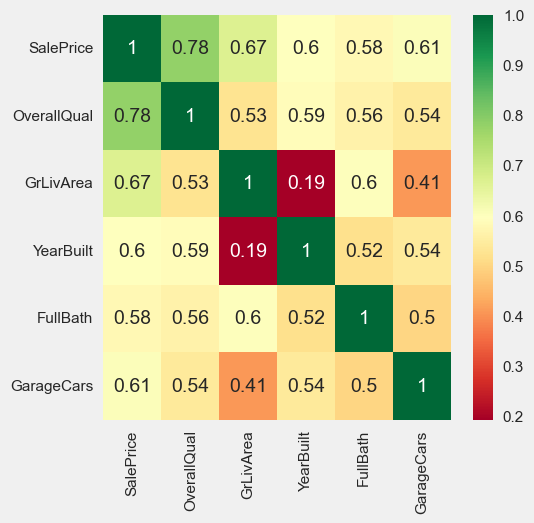

In [126]:
plt.figure(figsize=(5,5))
sns.heatmap(highCorrDF.corr(), cmap='RdYlGn', annot=True)
plt.show()